***Краткое описание задачи:***


**Шаг 1. Загрузка данных**

1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:

- /datasets/users_go.csv
- /datasets/rides_go.csv
- /datasets/subscriptions_go.csv
1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

**Шаг 2. Предобработка данных** 

2.1 Приведите столбец date к типу даты pandas.
2.2 Создайте новый столбец с номером месяца на основе столбца date.
2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

**Шаг 3. Исследовательский анализ данных** 

Опишите и визуализируйте общую информацию о пользователях и поездках:
3.1 частота встречаемости городов;
3.2 соотношение пользователей с подпиской и без подписки;
3.3 возраст пользователей;
3.4 расстояние, которое пользователь преодолел за одну поездку;
3.5 продолжительность поездок.

**Шаг 4. Объединение данных**

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. 
4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.
4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

**Шаг 5. Подсчёт выручки**

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. 

**Шаг 6. Проверка гипотез**
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров? Проверьте гипотезу и сделайте выводы.
6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Шаг 7. Распределения**

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 
399,5 тыс. пользователей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math

#### Шаг 1. Загрузка данных

#####  Считаем CSV-файлы с данными  и сохраним их в датафреймы

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

##### Изучим общую информацию о каждом датафрейме.

In [3]:
data_users.info()
data_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data_rides.info()
data_rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
data_subscriptions.info()
data_subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод**: Считали три csv-файла на их основе создали три датафрейма: `data_users`, `data_rides`, `data_subscription`. Датафрейм `data_users` содержит 1565 строк с информацией: id пользователя, имя, возраст, город и тип подписки. Датафрейм `data_rides` содержит 18068 строк с информацией о каждой поездке: id пользователя, дистанция поездки, время поездки и дату. Датафрейм `data_subscription` содержит 2 строки с информацией о ценах езды с подписокй и без подписки: тип подписки, сотоимость минуты, стоимость старта, стоимость подписки.

#### Шаг 2. Предобработка данных

##### Приведем столбец date к типу даты pandas.

In [6]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создадим новый столбец с номером месяца.

In [7]:
data_rides['month'] = data_rides['date'].dt.month

##### Обработаем пропущенные значения и дубликаты в датафреймах.

In [8]:
print(f'Количество дубликатов в data_rides - {data_rides.duplicated().sum()}')
print(f'Количество дубликатов в data_users - {data_users.duplicated().sum()}')

Количество дубликатов в data_rides - 0
Количество дубликатов в data_users - 31


In [9]:
data_users = data_users.drop_duplicates().reset_index(drop=True)
print(f'Количество дубликатов в data_users - {data_users.duplicated().sum()}')

Количество дубликатов в data_users - 0


#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов.

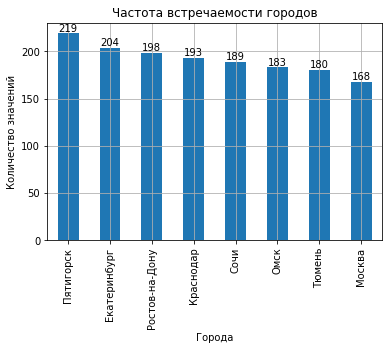

In [10]:
ax = data_users['city'].value_counts().plot(kind='bar', grid=True)
plt.title('Частота встречаемости городов')

for i, value in enumerate(data_users['city'].value_counts()):
    ax.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Города')
plt.ylabel('Количество значений')

plt.show()


Все занчения частоты встречаемости городов в датафрейме `data_users` в столбце `city` расположились в промежутке от 168 до 219 значений. Наиольшее количество значений в городах `Пятигорск` и `Екатеринбург` 219 и 204 соответственно. В середине списка по количеству значений расположились города `Ростов-на-Дону`, `Краснодар`, `Сочи`, `Омск` и `Тюмень` 198, 193, 189, 183 и 180 соответственно. Меньше всего значений из `Москвы` - 168 значений.

##### Cоотношение пользователей с подпиской и без подписки.

<function matplotlib.pyplot.show(close=None, block=None)>

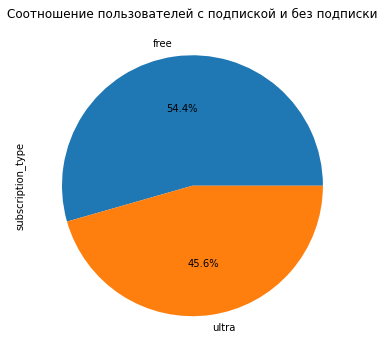

In [11]:
data_users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6)) 
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show

Количество пользователей с подпиской состовляет 45.6 процентов от общего количества пользователей. Количество пользователей без подписки состовляет 54.4 процента.

##### Возраст пользователей.

<function matplotlib.pyplot.show(close=None, block=None)>

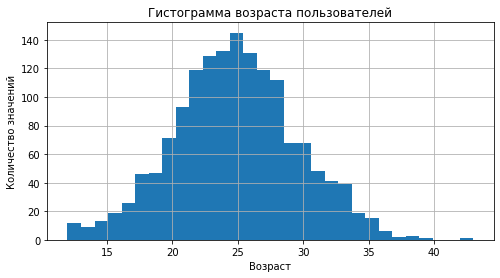

In [12]:
data_users['age'].plot(kind='hist', grid=True, bins=30, figsize=(8,4))
plt.title('Гистограмма возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество значений')
plt.show

In [13]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Гистограмма имеет тип распределения Пуассона. Возраст пользователей расположился в промежутке от `12` до `43` лет. Наибольшее количсетво пользователей имееют возраст от `20` до `30` лет. Реже можно встретить пользователей от `12` до `20` и от `30` до `35` лет. Крайне редко пользователю более `35` лет.

##### Расстояние, которое пользователь преодолел за одну поездку.

<function matplotlib.pyplot.show(close=None, block=None)>

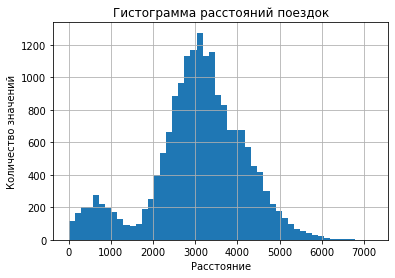

In [14]:
data_rides['distance'].plot(kind='hist', grid=True, bins=50)
plt.title('Гистограмма расстояний поездок')
plt.xlabel('Расстояние')
plt.ylabel('Количество значений')
plt.show

Наиболее часто имеет значение близкое к `3000` метров и с увеличением длины расстояние частота поездок уменьшается вплоть до `7000` метров. Также есть небольшой всплеск в районе `500` метров.

##### 

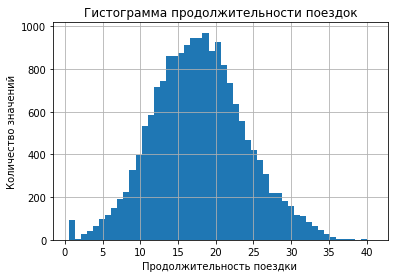

In [15]:
data_rides['duration'].plot(kind='hist', grid=True, bins=50)
plt.title('Гистограмма продолжительности поездок')
plt.xlabel('Продолжительность поездки ')
plt.ylabel('Количество значений')
plt.show()

In [16]:
print(data_rides.query('duration < 2')['duration'].unique())
data_rides.query('duration < 2')['distance'].sort_values()

[0.5]


15132    4030.308008
17909    4103.998874
10692    4106.278268
9698     4169.066800
14342    4177.139336
            ...     
14574    6316.574814
13701    6414.516026
11385    6601.197575
17242    6724.932981
16309    7211.007745
Name: distance, Length: 95, dtype: float64

data_rides.loc[data_rides['duration']<2, 'duration'] = 30

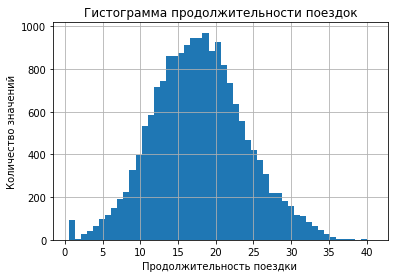

In [17]:
data_rides['duration'].plot(kind='hist', grid=True, bins=50)
plt.title('Гистограмма продолжительности поездок')
plt.xlabel('Продолжительность поездки ')
plt.ylabel('Количество значений')
plt.show()

График имеет тип распределения Пуассона. Большинство поездок длится от `12` до `21` минуты с равноудаленными хвостами в обе стороны.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм `data`

In [18]:
data = data_rides.merge(data_users, on = 'user_id')
data = data.merge(data_subscriptions, on = 'subscription_type')
data.head(5)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


#####  Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1.

- `data_free` c данными о пользователях без подписки;
- `data_ultra` с данными о пользователях с подпиской.

In [19]:
data_ultra = data[data['subscription_type'] == 'ultra'].reset_index(drop = True)
data_free = data[data['subscription_type'] == 'free'].reset_index(drop = True)

In [20]:
data_ultra.info()
data_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 609.5+ KB
<class 'pandas.core.frame.DataFrame'>
Ra

#####  Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

<function matplotlib.pyplot.show(close=None, block=None)>

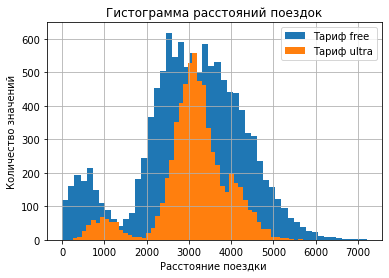

In [21]:
data_free['distance'].plot(kind='hist', grid=True, bins=50, label='Тариф free')
data_ultra['distance'].plot(kind='hist', grid=True, bins=50, label='Тариф ultra')

plt.title('Гистограмма расстояний поездок')
plt.xlabel('Расстояние поездки ')
plt.ylabel('Количество значений')

plt.legend()

plt.show

- Для пользователей с подпиской преобладают поездки длиной от `2,5 до 4 км`. Поездки длиной от `4 до 5 км` и `от 0 до 2 км` встречаются горазда реже. 
- Для пользователей без подписки преобладают поездки длиной `от 2 до 5 км`. Поездки длиной `от 5 до 7 км` и от `0 до 2 км` встречаются горазда реже.

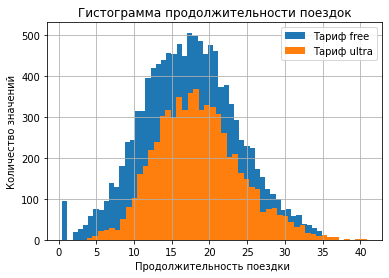

In [22]:
data_free['duration'].plot(kind='hist', grid=True, bins=50, label='Тариф free')
data_ultra['duration'].plot(kind='hist', grid=True, bins=50, label='Тариф ultra')

plt.title('Гистограмма продолжительности поездок')
plt.xlabel('Продолжительность поездки ')
plt.ylabel('Количество значений')
plt.legend()

plt.show()

- Для пользователей с подпиской: график имеет тип распределения Пуассона с пиком от `15 до 20 минут` и хвостами в обе стороны `до 3 и 40 минут`.
- Для пользователей без подписки: График имеет тип распределения Пуассона с пиком от `13 до 22 минут` и хвостами в обе стороны `до 2 и 35 минут`.

#### Шаг 5. Подсчёт выручки

##### Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Создадим сводную таблицу `data_revenue`.

In [23]:
data['duration'] = np.ceil(data['duration']) 

In [24]:
data['count'] = 1
data_revenue = data.pivot_table(index=['user_id', 'month'], values=['distance', 'duration', 'count'], aggfunc='sum').reset_index()
data_revenue.head(5)

,user_id,month,count,distance,duration
0,1,1,2,7027.511294,42.0
1,1,4,1,754.159807,7.0
2,1,8,2,6723.470560,46.0
3,1,10,2,5809.911100,32.0
4,1,11,3,7003.499363,56.0


##### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

Создадим функцию для подсчета выручки от каждого пользователя.

In [25]:
def calculate_value(row):
    return row['start_ride_price']*row['count'] + row['minute_price']*math.ceil(row['duration']) + row['subscription_fee']

Добавляем столбец `value` в датафрейм `data_revenue`.

In [26]:
data_revenue['value'] = data_revenue.merge(data_users[['user_id', 'subscription_type']], on='user_id').merge(
    data_subscriptions, on='subscription_type').apply(calculate_value, axis=1)

In [27]:
data_revenue

,user_id,month,count,distance,duration,value
0,1,1,2,7027.511294,42.0,451
1,1,4,1,754.159807,7.0,241
2,1,8,2,6723.470560,46.0,475
3,1,10,2,5809.911100,32.0,391
4,1,11,3,7003.499363,56.0,535
...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26.0,308
11327,1534,8,2,7622.453034,48.0,484
11328,1534,9,1,4928.173852,23.0,234
11329,1534,11,4,13350.015305,78.0,824


#### Шаг 6. Проверка гипотез

##### Проверим гипотезу, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

- Нулевая гипотеза: среднее значение времени поездки для пользователей с подпиской и без подписки равны.
- Альтернативная гипотеза: среднее значение времени поездки для пользователей с подпиской больше, чем среднее значение времени пездки для пользователей без подписки

In [28]:
alpha = 0.01

results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('Нет осований отвергать нулевую гипотезу')

p-value: 1.2804098316645618e-34
отвергаем нулевую гипотезу


**Вывод:** Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписок.

##### Проверим гипотезу, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.



- Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 метров.
- Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров. 

In [29]:
alpha= 0.01
optimal_distance = 3130

results = st.ttest_1samp(data_ultra['distance'], optimal_distance, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('Нет осований отвергать нулевую гипотезу')

p-value: 0.9195368847849785
Нет осований отвергать нулевую гипотезу


**Вывод:** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.


##### Проверим гипотезу, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

- Нулевая гипотеза: помесячная выручка от пользователей с подпиской и от пользователей без подписки равна. 
- Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

In [30]:
data_revenue_sub = data_revenue.merge(data_users[['user_id', 'subscription_type']], on='user_id')

ultra_value = data_revenue_sub.loc[data_revenue_sub['subscription_type']=='ultra', 'value']
free_value = data_revenue_sub.loc[data_revenue_sub['subscription_type']=='free', 'value']
print(ultra_value.mean()) 
print(free_value.mean())
alpha = 0.01

results = st.ttest_ind(ultra_value, free_value, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('Нет осований отвергать нулевую гипотезу')

362.7921906022502
328.6413651073845
p-value: 1.8850394384715216e-31
отвергаем нулевую гипотезу


**Вывод:** Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

##### Количество обращений в техподдержку.

Данные воборки взаимосвязаны, поэтому для проверки этой гипотезы нужно использовать метод `scipy.stats.ttest_rel()`.

#### Шаг 7. Распределения

##### Aкция с раздачей промокодов.

 Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план в 100 пользователей была примерно 5%.


In [31]:
from math import sqrt
from scipy import stats as st

n = 1000
p = 0.1
alpha = 0.05
result = 1

while result > alpha:
    mu = n * p
    sigma = sqrt(n * p * (1-p))
    distr = st.norm(mu, sigma)
    result = distr.cdf(100)
    n += 1

print(result)
print(n)

0.04971489312694162
1170


**Вывод:** Отделу маркетинга нужна выдать 1170 промокодов, чтобы шанс не выполнить план в 100 пользователей был не больше 5%.

##### Push-уведомления в мобильном приложении.

Оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [32]:
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1-p))
distr = st.norm(mu, sigma)
result = 1 - distr.cdf(399500)
result

0.8462829170363023

**Вывод:** Вероятность того, что 399,5 тыс. из 1 млн. пользователей откроют уведомления равна примерно 84%.

#### Общий вывод

**Предобработка данных**:
- Преобразован столбец date в data_rides в формат datetime для удобства работы с датами.
- Добавлен новый столбец month, чтобы анализировать данные по месяцам.
- Удалены дубликаты из data_users.
- В столбце duration выявлены и исправлены аномальные значения: значение 0.5 заменено на 30 минут.

**Исследовательский анализ данных**:
- Наибольшее количество пользователей зарегистрировано в Пятигорске и Екатеринбурге. Москва имеет наименьшее количество пользователей.
- Пользователи с подпиской составляют 45.6% от общего числа, без подписки — 54.4%.
- Большинство пользователей находятся в возрастной группе от 20 до 30 лет.
- Чаще всего пользователи преодолевают около 3 км за одну поездку. Есть небольшой всплеск поездок длиной до 500 метров.
- Среднее время поездки составляет 12–21 минуту.

**Объединение данных**:
- Создан единый датафрейм data, объединивший данные пользователей, поездок и подписок.
- Данные о пользователях с подпиской (ultra) и без подписки (free) разделены на два отдельных датафрейма.

**Подсчёт выручки**:
- Рассчитаны суммарное расстояние, время поездок, количество поездок и суммарная выручка для каждого пользователя.

**Проверка гипотез**: 
- Гипотеза 1: Пользователи с подпиской тратят больше времени на поездки. Результат: Пользователи с подпиской действительно тратят больше времени на поездки.
- Гипотеза 2: Среднее расстояние поездок пользователей с подпиской не превышает 3130 метров. Результат: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- Гипотеза 3: Выручка от пользователей с подпиской выше, чем от пользователей без подписки. Результат: Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

**Распределения**:
- Отделу маркетинга нужна выдать 1170 промокодов, чтобы шанс не выполнить план в 100 пользователей был не больше 5%.
- Вероятность того, что 399,5 тыс. из 1 млн. пользователей откроют уведомления равна примерно 84%.